In [2]:
# Cell 1: Setup, imports, configure printing and load dataset from CSV
# PEP8: keep lines reasonably short, add comments for clarity.

import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for Jupyter
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_colwidth", 200)
pd.set_option("display.precision", 3)

# Path to the converted CSV file
data_path = Path("data/spotify.csv")

if not data_path.exists():
    raise FileNotFoundError(
        "❌ CSV file not found. Please run convert_parquet_to_csv.py first "
        "to generate data/spotify.csv."
    )

print(f"📂 Loading data from: {data_path}")
df = pd.read_csv(data_path)

print(f"✅ Loaded dataframe with shape: {df.shape}")
display(df.head(5))


📂 Loading data from: data\spotify.csv
✅ Loaded dataframe with shape: (114000, 21)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.032,1.010e-06,0.358,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,1,0.076,0.924,5.560e-06,0.101,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,-9.734,1,0.056,0.210,0.000e+00,0.117,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Soundtrack),Can't Help Falling In Love,71,201933,False,0.266,0.060,0,-18.515,1,0.036,0.905,7.070e-05,0.132,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,2,-9.681,1,0.053,0.469,0.000e+00,0.083,0.167,119.949,4,acoustic


In [3]:
# Cell 2: Quick peek and dataframe info

# Show the first 8 rows of the dataset
display(df.head(8))

# Basic information about columns and their data types
print("\n--- DataFrame Info ---")
df.info()

# Summary statistics for numeric columns
print("\n--- Numeric Summary ---")
display(df.describe().T)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.032,1.010e-06,0.358,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,1,0.076,0.924,5.560e-06,0.101,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,-9.734,1,0.056,0.210,0.000e+00,0.117,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Soundtrack),Can't Help Falling In Love,71,201933,False,0.266,0.060,0,-18.515,1,0.036,0.905,7.070e-05,0.132,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,2,-9.681,1,0.053,0.469,0.000e+00,0.083,0.167,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,6,-8.807,1,0.105,0.289,0.000e+00,0.189,0.666,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,2,-8.822,1,0.035,0.857,2.890e-06,0.091,0.076,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.444,11,-9.331,1,0.042,0.559,0.000e+00,0.097,0.712,150.960,4,acoustic



--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,114000.0,56999.500,32909.110,0.000,28499.750,5.700e+04,85499.250,1.140e+05
popularity,114000.0,33.239,22.305,0.000,17.000,3.500e+01,50.000,1.000e+02
duration_ms,114000.0,228029.153,107297.713,0.000,174066.000,2.129e+05,261506.000,5.237e+06
danceability,114000.0,0.567,0.174,0.000,0.456,5.800e-01,0.695,9.850e-01
energy,114000.0,0.641,0.252,0.000,0.472,6.850e-01,0.854,1.000e+00
key,114000.0,5.309,3.560,0.000,2.000,5.000e+00,8.000,1.100e+01
loudness,114000.0,-8.259,5.029,-49.531,-10.013,-7.004e+00,-5.003,4.532e+00
mode,114000.0,0.638,0.481,0.000,0.000,1.000e+00,1.000,1.000e+00
speechiness,114000.0,0.085,0.106,0.000,0.036,4.890e-02,0.085,9.650e-01
acousticness,114000.0,0.315,0.333,0.000,0.017,1.690e-01,0.598,9.960e-01


In [4]:
# Cell 3: Clean column names and simple conversions
# Normalize column names
original_columns = df.columns.tolist()
df.columns = (
    df.columns.str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
    .str.replace("(", "")
    .str.replace(")", "")
)

print("Original columns:")
print(original_columns)
print("\nNormalized columns:")
print(df.columns.tolist())

# Trim whitespace for string columns
str_cols = df.select_dtypes(include=["object"]).columns
for col in str_cols:
    df[col] = df[col].astype(str).str.strip()

# Convert 'explicit' to boolean if present
if "explicit" in df.columns:
    df["explicit"] = df["explicit"].replace(
        {"True": True, "true": True, "False": False, "false": False, "0": False, "1": True}
    )
    # fallback numeric to bool
    if df["explicit"].dtype != "bool":
        df["explicit"] = df["explicit"].astype("boolean")

# Convert duration from ms to seconds and minutes
if "duration_ms" in df.columns:
    df["duration_sec"] = pd.to_numeric(df["duration_ms"], errors="coerce") / 1000.0
    df["duration_min"] = df["duration_sec"] / 60.0

# Convert known numeric-like columns to numeric (coerce errors to NaN)
numeric_candidates = [
    "popularity",
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms",
    "duration_sec",
    "duration_min",
]
for col in numeric_candidates:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")


Original columns:
['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']

Normalized columns:
['unnamed:_0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


In [5]:
# Cell 4: Missing values, duplicates, and basic cleaning actions

# Missing values per column (descending)
missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print("Columns with missing values and counts:")
display(missing)

# Duplicate check - by track_id if present, otherwise whole row
if "track_id" in df.columns:
    dup_count = df.duplicated(subset=["track_id"]).sum()
    print(f"\nDuplicate track_id count: {dup_count}")
    if dup_count:
        # keep first occurrence
        df = df.drop_duplicates(subset=["track_id"], keep="first")
else:
    dup_count = df.duplicated().sum()
    print(f"\nDuplicate full-row count: {dup_count}")
    if dup_count:
        df = df.drop_duplicates(keep="first")

print(f"\nData shape after duplicate removal: {df.shape}")


Columns with missing values and counts:


Series([], dtype: int64)


Duplicate track_id count: 24259

Data shape after duplicate removal: (89741, 23)


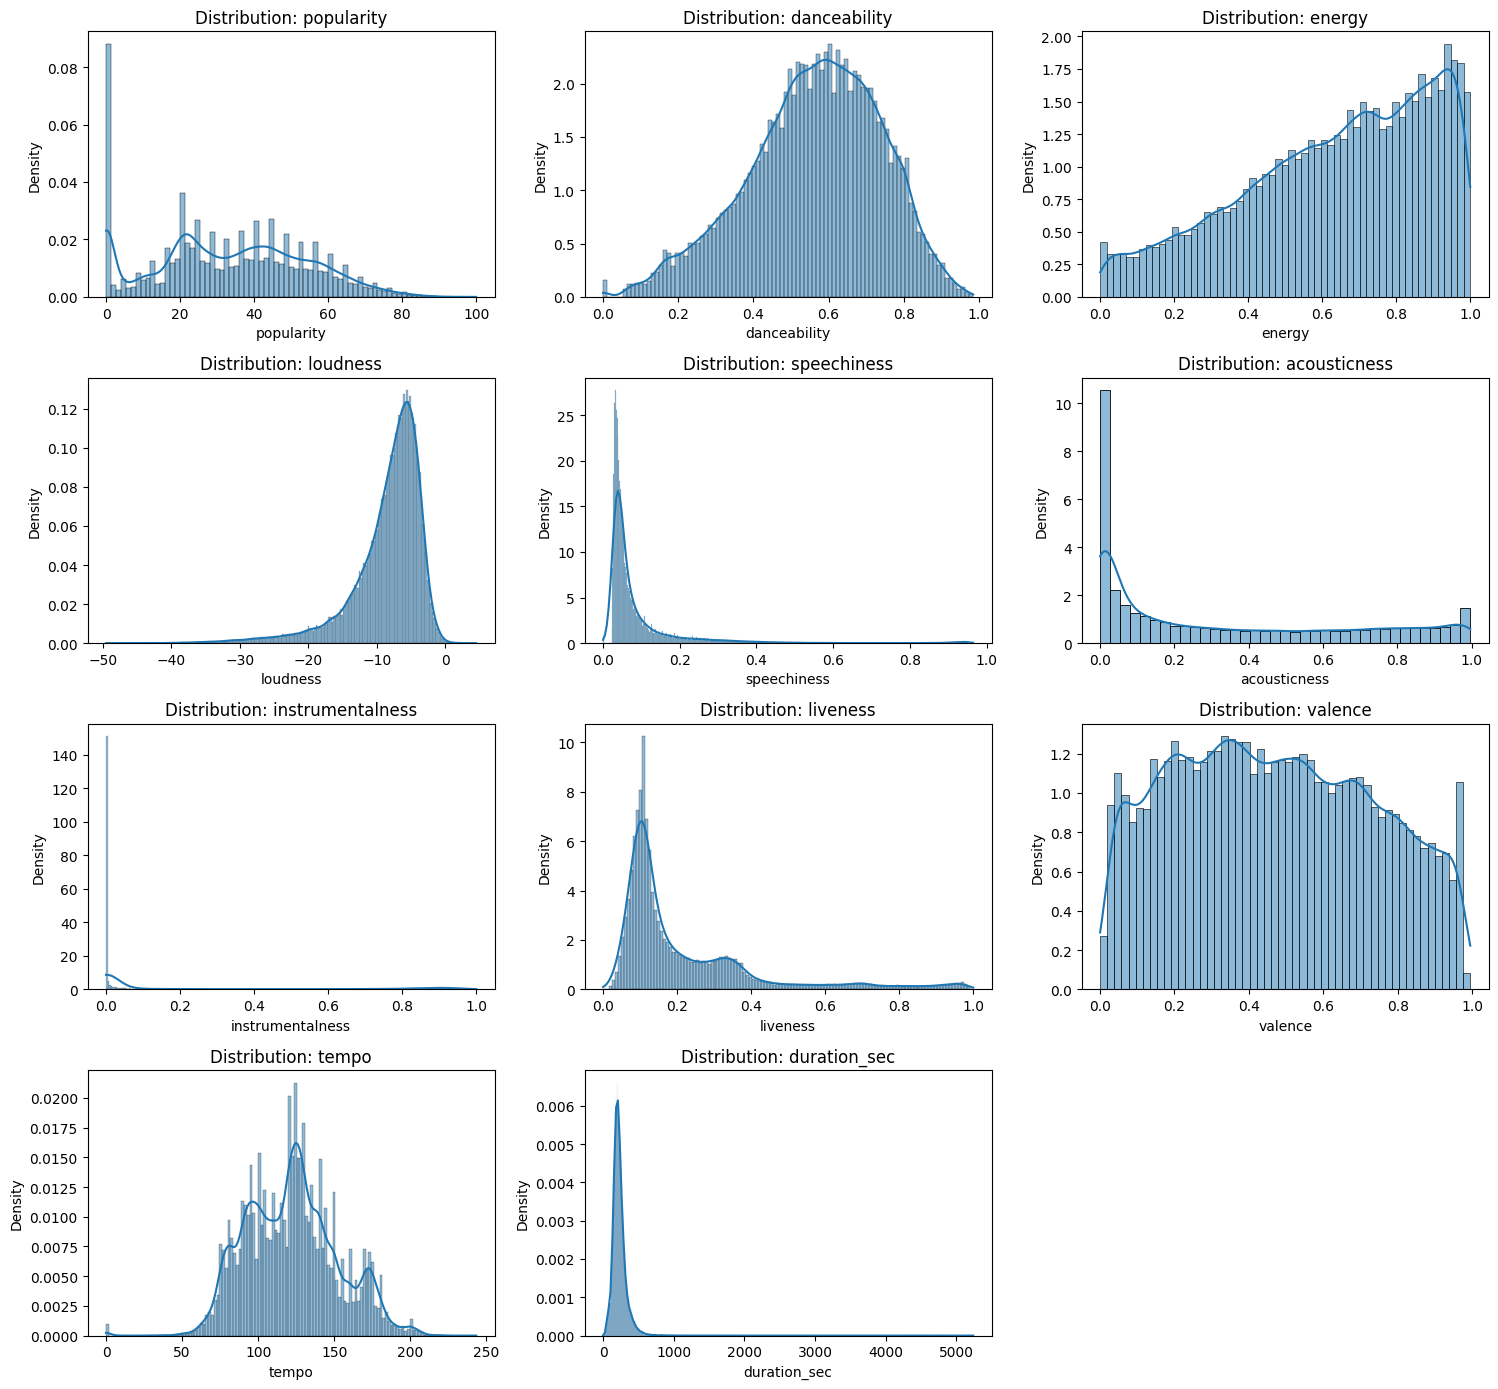

In [6]:
# Cell 5: Univariate distributions for selected numeric features

# Select features to plot (present in dataframe)
features = [
    "popularity",
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_sec",
]
features = [f for f in features if f in df.columns]

# Create a grid of histograms
n = len(features)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(5 * cols, 3.5 * rows))
for i, feat in enumerate(features, 1):
    ax = plt.subplot(rows, cols, i)
    sns.histplot(df[feat].dropna(), kde=True, stat="density", ax=ax)
    ax.set_title(f"Distribution: {feat}")
plt.tight_layout()
plt.show()


Top genres (by count):


track_genre
acoustic         1000
alt-rock          999
tango             999
ambient           999
afrobeat          999
cantopop          999
bluegrass         998
forro             998
study             998
chicago-house     998
disney            998
sleep             997
heavy-metal       997
breakbeat         997
black-metal       996
j-idol            995
happy             995
anime             995
club              994
comedy            990
Name: count, dtype: int64

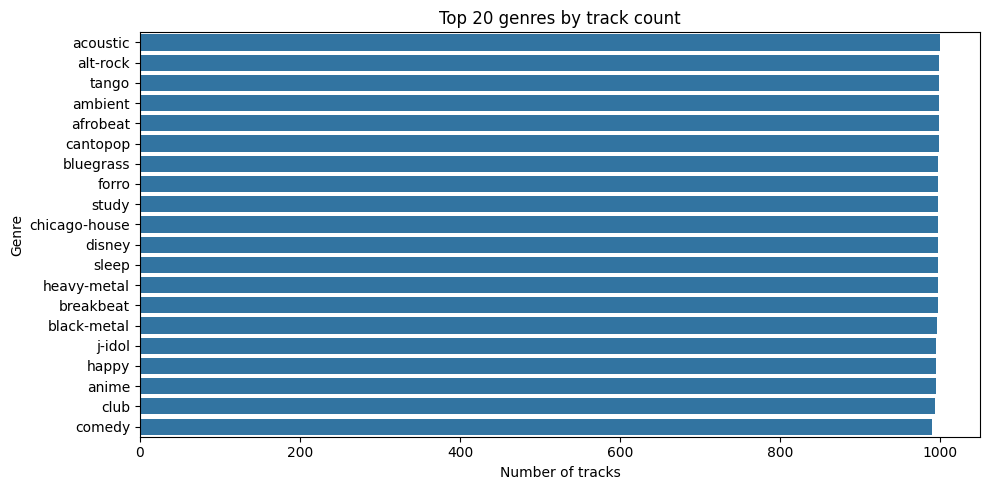


Median popularity for genres with >=10 tracks:


,median,count
track_genre,,
pop,65.0,416
metal,63.0,232
k-pop,61.0,917
pop-film,60.0,815
hip-hop,59.0,842
chill,57.0,972
edm,55.0,694
singer-songwriter,54.0,527
grunge,54.0,862


In [7]:
# Cell 6: Genre counts and median popularity by genre

if "track_genre" in df.columns:
    # Count top genres
    top_genres = df["track_genre"].value_counts().nlargest(20)
    print("Top genres (by count):")
    display(top_genres)

    # Barplot of top genres
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_genres.values, y=top_genres.index)
    plt.title("Top 20 genres by track count")
    plt.xlabel("Number of tracks")
    plt.ylabel("Genre")
    plt.tight_layout()
    plt.show()

    # Median popularity per genre (for genres with enough samples)
    genre_pop = df.groupby("track_genre")["popularity"].agg(["median", "count"]).sort_values(
        by="median", ascending=False
    )
    # show genres with at least 10 tracks
    genre_pop_filtered = genre_pop[genre_pop["count"] >= 10]
    print("\nMedian popularity for genres with >=10 tracks:")
    display(genre_pop_filtered.head(20))
else:
    print("No 'track_genre' column found in the dataset.")


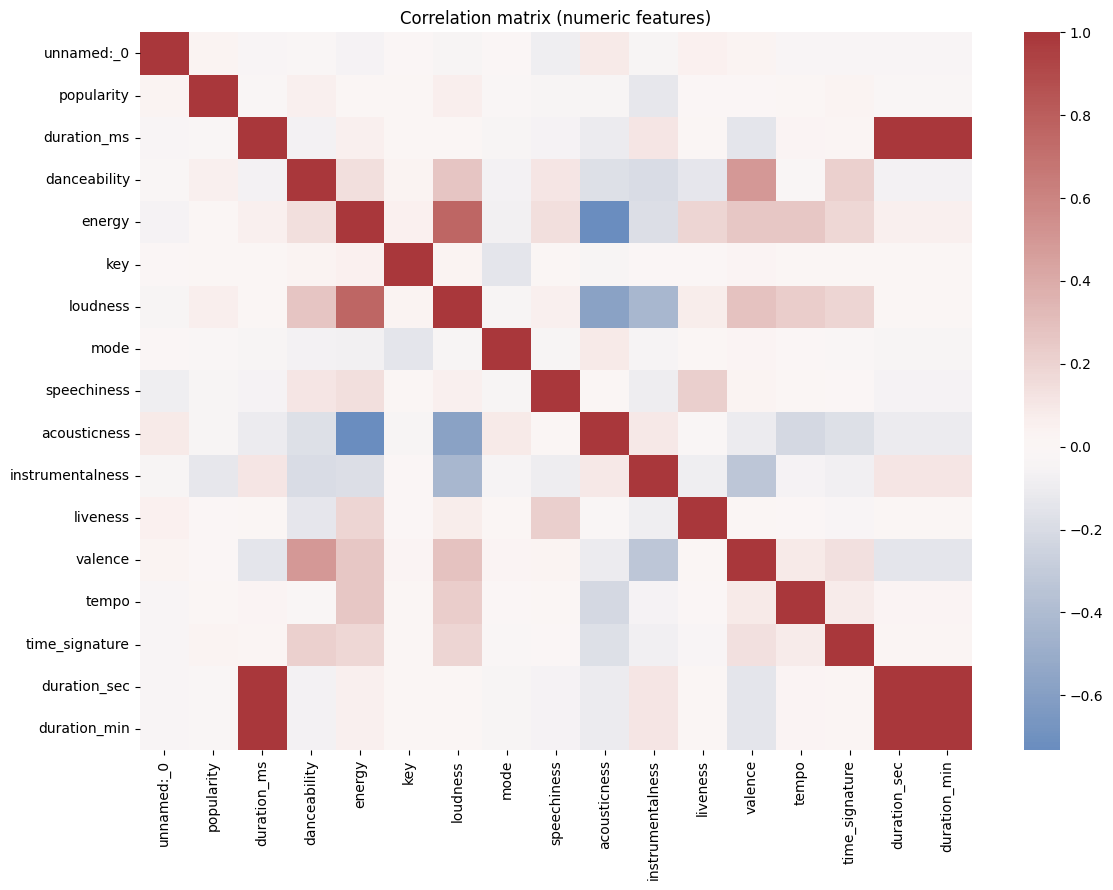


Features most correlated with popularity:


popularity          1.000
instrumentalness    0.127
loudness            0.072
danceability        0.064
speechiness         0.047
acousticness        0.039
time_signature      0.037
unnamed:_0          0.036
duration_min        0.023
duration_ms         0.023
Name: popularity, dtype: float64

In [8]:
# Cell 7: Correlation matrix & heatmap for numeric columns
numeric_df = df.select_dtypes(include=[np.number]).copy()
corr = numeric_df.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=False, fmt=".2f", cmap="vlag", center=0)
plt.title("Correlation matrix (numeric features)")
plt.tight_layout()
plt.show()

# Print strongest correlations with popularity (if present)
if "popularity" in corr.columns:
    pop_corr = corr["popularity"].abs().sort_values(ascending=False)
    print("\nFeatures most correlated with popularity:")
    display(pop_corr.head(10))


In [9]:
# Cell 8: Save a cleaned version for future modeling
output_dir = Path("data")
output_dir.mkdir(parents=True, exist_ok=True)
clean_path = output_dir / "spotify_cleaned.csv"

# Minimal cleaned df - keep original columns + some derived ones
cols_to_save = df.columns.tolist()
df[cols_to_save].to_csv(clean_path, index=False)
print(f"Cleaned dataset saved to: {clean_path}")


Cleaned dataset saved to: data\spotify_cleaned.csv
